In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib as plt

train = pd.read_csv('C:/Users/Roy/Desktop/loan/train.csv') 
test = pd.read_csv('C:/Users/Roy/Desktop/loan/test.csv')

Populating the interactive namespace from numpy and matplotlib


## Distribution analysis

### ApplicantIncome

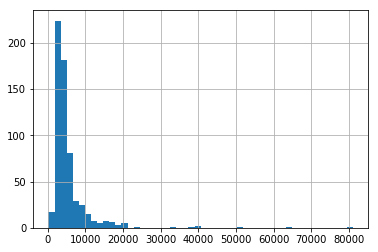

In [2]:
train['ApplicantIncome'].hist(bins=50)

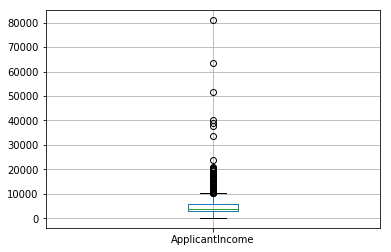

In [3]:
train.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values

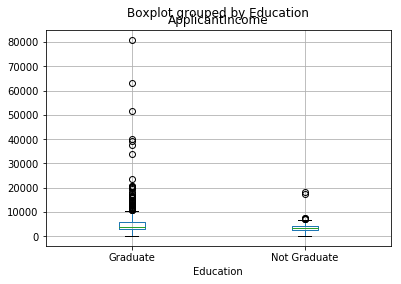

In [4]:
train.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

### LoanAmount

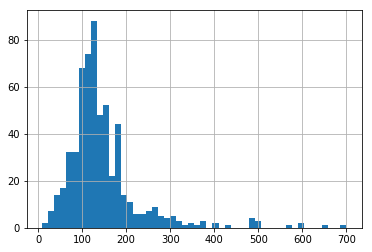

In [6]:
train['LoanAmount'].hist(bins=50)

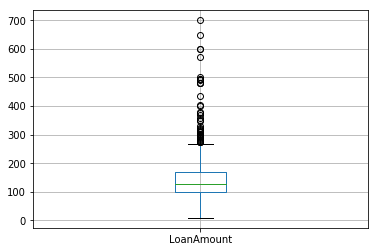

In [7]:
train.boxplot(column='LoanAmount')

## Categorical variable analysis

Frequency Table for Credit History:

In [8]:
train['Credit_History'].value_counts(ascending=True)

0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:

In [9]:
train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


Let's plot the relation between Credit_History and our class variable (Loan_Status):

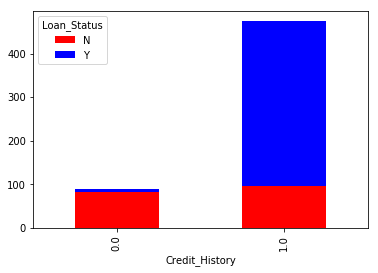

In [10]:
temp1 = pd.crosstab(train['Credit_History'], train['Loan_Status'])
temp1.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

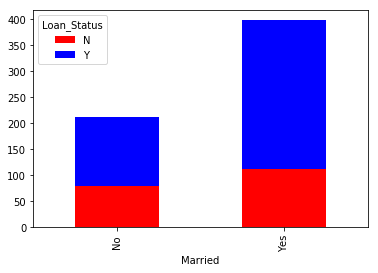

In [12]:
temp2 = pd.crosstab(train['Married'], train['Loan_Status'])
temp2.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

And plot the relation between Self_Employed and our class variable (Loan_Status):

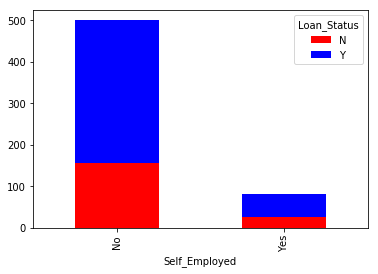

In [13]:
temp3 = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

And also plot the relation between Property_Area and our class variable (Loan_Status):

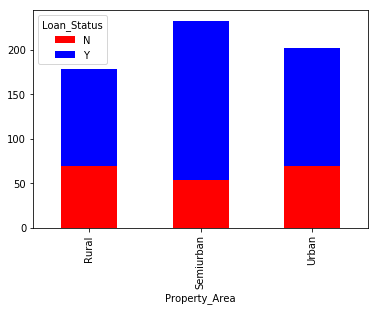

In [14]:
temp4 = pd.crosstab(train['Property_Area'], train['Loan_Status'])
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

## Data Preparation

### Fill missing values for both train and test

In [15]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
test.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [17]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [18]:
train['Gender'].fillna('Male', inplace=True)
test['Gender'].fillna('Male', inplace=True)

In [19]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [20]:
train['Married'].fillna('Yes', inplace=True)

In [21]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [22]:
train['Dependents'].fillna(0, inplace=True)
test['Dependents'].fillna(0, inplace=True)

In [23]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
train['Self_Employed'].fillna("No", inplace=True)
test['Self_Employed'].fillna("No", inplace=True)

In [25]:
train['LoanAmount'].fillna(mean(train['LoanAmount']), inplace=True)
test['LoanAmount'].fillna(mean(train['LoanAmount']), inplace=True)

In [26]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [27]:
train['Loan_Amount_Term'].fillna(360, inplace=True)
test['Loan_Amount_Term'].fillna(360, inplace=True)

In [28]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [29]:
train['Credit_History'].fillna(1, inplace=True)
test['Credit_History'].fillna(1, inplace=True)

In [30]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
test.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Now we have no missing values

### Discretize our numerical variables

In [32]:
train['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

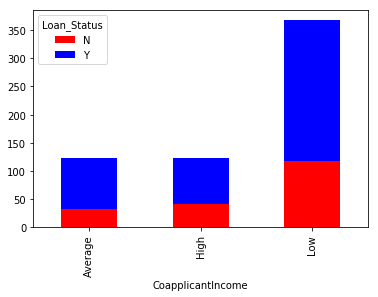

In [33]:
labels = ["Low", "Average", "High"]
discrete_CoapplicantIncome = pd.qcut(train['CoapplicantIncome'], 5, duplicates='drop', labels=labels)
temp5 = pd.crosstab(discrete_CoapplicantIncome, train['Loan_Status'])
temp5.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
train['CoapplicantIncome'] = discrete_CoapplicantIncome
test_discrete_CoapplicantIncome = pd.qcut(test['CoapplicantIncome'], 5, duplicates='drop', labels=labels)
test['CoapplicantIncome'] = test_discrete_CoapplicantIncome

In [34]:
train['LoanAmount'].describe()

count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

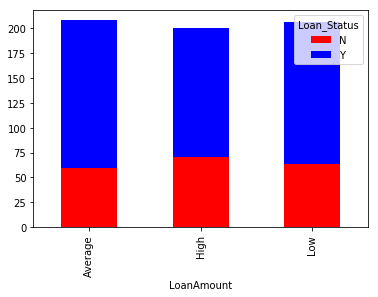

In [35]:
labels = ["Low", "Average", "High"]
discrete_LoanAmount = pd.qcut(train['LoanAmount'], 3, duplicates='drop', labels=labels)
temp6 = pd.crosstab(discrete_LoanAmount, train['Loan_Status'])
temp6.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
train['LoanAmount'] = discrete_LoanAmount
test_discrete_LoanAmount = pd.qcut(test['LoanAmount'], 3, duplicates='drop', labels=labels)
test['LoanAmount'] = test_discrete_LoanAmount

## Building a Predictive Model

In [36]:
train.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome    category
LoanAmount           category
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
dtype: object

In [37]:
test.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome    category
LoanAmount           category
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area', 'Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i].astype(str))
    
var_mod2 = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for i in var_mod2:
    test[i] = le.fit_transform(test[i].astype(str))

In [39]:
from sklearn import metrics
from sklearn.cross_validation import KFold
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

def save(prediction, fileName):
    df_sub=pd.DataFrame({"Loan_ID":test.Loan_ID,"Loan_Status":prediction})
    df_sub.to_csv('C:/Users/Roy/Desktop/loan/'+fileName+'.csv', sep=',', index=False)

C:\Python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### ExtraTreesClassifier

ExtraTreesClassifier implements a meta estimator that fits a number of randomized decision trees (extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.



In [61]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesModel = ExtraTreesClassifier(max_features='auto', bootstrap=True, oob_score=True, n_estimators=500, max_depth=None, min_samples_split=7)
predictors = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
outcome = 'Loan_Status'
classification_model(ExtraTreesModel, train, predictors, outcome)
#ExtraTreesModel.fit(train[predictors], train[outcome])
test2 = test[predictors]
ExtraTreesModel_prediction = ExtraTreesModel.predict(test2)
temp_array = [None] * len(ExtraTreesModel_prediction)
for i in xrange(0, len(ExtraTreesModel_prediction)-1):
    if ExtraTreesModel_prediction[i] == 1:
        temp_array[i] = 'Y'
    else:
        temp_array[i] = 'N'
save(temp_array, 'ExtraTreesTest')

Accuracy : 84.853%


Cross-Validation Score : 80.295%


### GradientBoostingClassifier

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingModel = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, subsample=0.5, random_state=0)
predictors = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
outcome = 'Loan_Status'
classification_model(GradientBoostingModel, train, predictors, outcome)
test3 = test[predictors]
GradientBoostingModel_Prediction = ExtraTreesModel.predict(test3)
temp_array2 = [None] * len(ExtraTreesModel_prediction)
for i in xrange(0, len(GradientBoostingModel_Prediction)-1):
    if GradientBoostingModel_Prediction[i] == 1:
        temp_array2[i] = 'Y'
    else:
        temp_array2[i] = 'N'
save(temp_array2, 'GradientBoostingTest')

Accuracy : 99.837%


Cross-Validation Score : 74.598%
